## 04. PYTORCH CUSTOM DATASETS VIDEO NOTEBOOK

we have used some datasets eith pytorch before \
but how do you ge your own data into pytorch 

one of the ways to do is via: custom datastes 

### domain libraires 
depending on what you are working on vision , text, audio, recomnedation ,we will want to look into each of the pytorch existing data truth version of netowork 04 

In [1]:
import torch
from torch import nn
torch.__version__

'2.3.0+cu121'

In [2]:
# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
device

'cuda'

In [4]:
!nvidia-smi

Wed Jun 12 22:04:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P3              16W /  35W |     10MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### get data 

 our data set is a subset of the food101 dataset

food101 starts 101  differtenet classes of food and 1000 images per class (750 training , 250 testing)

why do this?
when starting out ML projects it;s important o try thisngs on a small scale and then increase the scale whene necessary . The whole point is to speed up how fast you can experiment 

In [5]:
import requests
import zipfile
from pathlib import Path

# set path to a data folder 
data_path = Path('data/')
image_path = data_path /'pizza_steak_sushi'

# if the image folder doesn't exist download it and prepare it....\
if image_path.is_dir():
    print(f'{image_path} direcctory already exists ..... skippping dowload ')
else :
    print(f'{image_path} does not exist , creating onr ......')
    image_path.mkdir(parents = True,exist_ok = True)

# dowload pizza , steak and sushi data
with open(data_path /'pizza_steak_sushi.zip','wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('downloading')
    f.write(request.content)
# unzip 
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
    print('inzipping pizza , steak and sushi data...')
    zip_ref.extractall(image_path)

data/pizza_steak_sushi direcctory already exists ..... skippping dowload 
downloading
inzipping pizza , steak and sushi data...


### Become one with the data (data prepration  and exporation )

In [6]:
import os
def walk_through_dir(dir_path):
    '''Walks through the dir_path returning its content 
    
    '''
    for dirpath , dirnames,filenames  in os.walk(dir_path):
        print(f'therer ar {len(dirnames)} directories and {len(filenames)} image in {dirpath}')

In [7]:
walk_through_dir(image_path)

therer ar 3 directories and 1 image in data/pizza_steak_sushi
therer ar 0 directories and 1 image in data/pizza_steak_sushi/.ipynb_checkpoints
therer ar 3 directories and 0 image in data/pizza_steak_sushi/train
therer ar 0 directories and 78 image in data/pizza_steak_sushi/train/pizza
therer ar 0 directories and 72 image in data/pizza_steak_sushi/train/sushi
therer ar 0 directories and 75 image in data/pizza_steak_sushi/train/steak
therer ar 3 directories and 0 image in data/pizza_steak_sushi/test
therer ar 0 directories and 25 image in data/pizza_steak_sushi/test/pizza
therer ar 0 directories and 31 image in data/pizza_steak_sushi/test/sushi
therer ar 0 directories and 19 image in data/pizza_steak_sushi/test/steak


In [8]:
## setup the traing and testing paths 
train_dir =image_path /'train'
test_dir = image_path /'test'

train_dir ,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### visualising an image

* let's write some code to :
* 1. get all fo the image paths
  2. pick a random imge path using pytorch random.choice()
  3. get the image class name using `pathlib.pathy.parrnt.stem`
  4. since we are working with imaes let's open the  Pytorch with Python's PIL
  5. we will then show the image and print metadata

data/pizza_steak_sushi/train/sushi/390178.jpg
sushi
random image path data/pizza_steak_sushi/train/sushi/390178.jpg
image class sushi
image width 512
image height 384


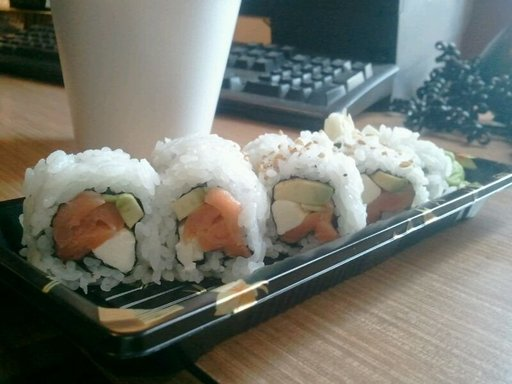

In [9]:
import random
from PIL import Image

# set random seed
# random.seed(42)

#1. get all images paths 
images_path_list = list(image_path.glob('*/*/*.jpg'))

#2. pick a random images path 
random_image_path = random.choice(images_path_list)
print(random_image_path)

#3 get the image class from the path name(the image class is the name of the directory whre the image is stored
image_class = random_image_path.parent.stem
print(image_class)

#4. open image 
img = Image.open(random_image_path)

#5 . print meta data
print(f'random image path {random_image_path}')
print(f'image class {image_class}')
print(f'image width {img.width}')
print(f'image height {img.height}')
img

In [10]:
## try to visulaize an image with matplotlib
import matplotlib.pyplot as plt
import numpy as np


(-0.5, 511.5, 383.5, -0.5)

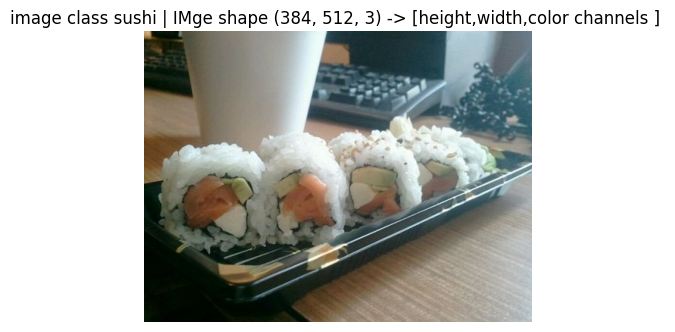

In [11]:
# turn the image into an array
img_as_array = np.asarray(img)

#plot the imge with matplot 
plt.figure(figsize=(5,6))
plt.imshow(img_as_array)
plt.title(f'image class {image_class} | IMge shape {img_as_array.shape} -> [height,width,color channels ] ')
plt.axis(False)

In [12]:
img_as_array

array([[[199, 167, 116],
        [194, 162, 111],
        [196, 163, 110],
        ...,
        [107, 124, 144],
        [108, 125, 145],
        [109, 126, 146]],

       [[201, 168, 117],
        [195, 162, 111],
        [196, 163, 110],
        ...,
        [107, 124, 144],
        [108, 125, 145],
        [108, 125, 145]],

       [[202, 166, 116],
        [196, 160, 110],
        [198, 162, 110],
        ...,
        [106, 123, 143],
        [107, 124, 144],
        [107, 124, 144]],

       ...,

       [[  1,  22,   5],
        [  1,  22,   5],
        [  3,  21,   5],
        ...,
        [183, 196, 202],
        [180, 193, 199],
        [178, 191, 197]],

       [[  0,  21,   4],
        [  0,  21,   4],
        [  0,  20,   3],
        ...,
        [183, 196, 202],
        [181, 194, 200],
        [178, 191, 197]],

       [[  0,  20,   3],
        [  0,  20,   3],
        [  0,  19,   2],
        ...,
        [182, 195, 201],
        [184, 197, 203],
        [184, 197, 203]]

### 3. Transforming data
* before we can use ou r image data with pytorch
* 1. turn your targets into tensors (in our case , numerica reprwsentation of our image)
  2. turn it into `torch.utils.data.datasets` and subsequently a `torch.utils.data.Dataloader`

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

/home/anubhav/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


### transforming data with torchvision.trasforms

In [14]:
# write a trasform for image
data_trasform = transforms.Compose([
    # resize our image
    transforms.Resize(size =(64,64)),
    # filp the image randomly on the horizontal 
    transforms.RandomVerticalFlip(p =0.5),
    # turn the image into a torch.tensor
    transforms.ToTensor()
])

In [15]:
data_trasform(img).shape

torch.Size([3, 64, 64])

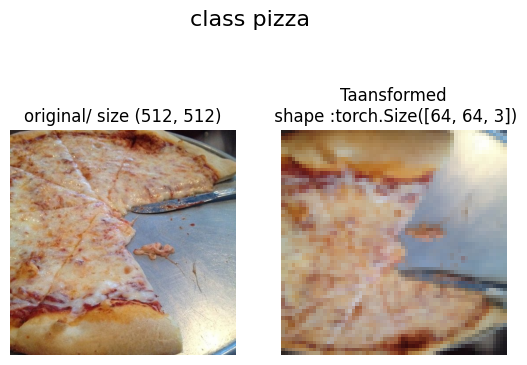

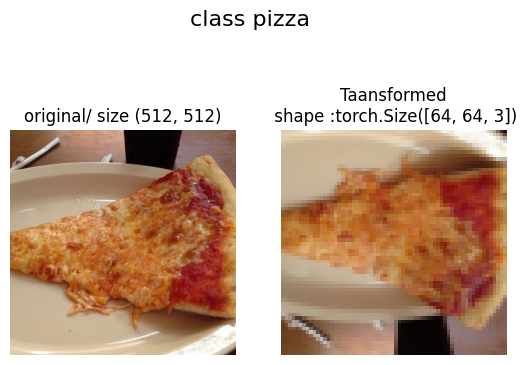

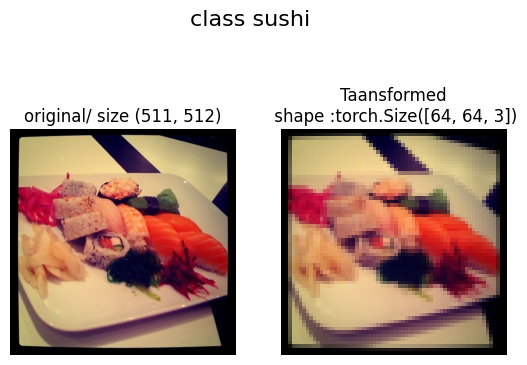

In [16]:
def plot_transformed_image(image_paths :list ,transform , n =3, seed =None):
    """ 
    select random imges froma path of images and transform  them 
    the the original vs the trasformed imgae 
    """ 
    if seed :
        random.seed(seed)
    random_image_paths = random.sample(image_paths ,k = n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig , ax =plt.subplots(nrows = 1, ncols =2)
            ax[0].imshow(f)
            ax[0].set_title(f'original/ size {f.size}')
            ax[0].axis(False)
    
           # transform and plot target image
            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1,2,0) # note we will need to change shape 
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Taansformed\n shape :{transformed_image.shape}')
            ax[1].axis('off')
    
            fig.suptitle(f'class {image_path.parent.stem}' ,fontsize = 16)
plot_transformed_image(image_paths = images_path_list ,
                      transform= data_trasform,
                       n = 3,
                      seed = 42 )

### 4.1  Option 1 :  loading iamge data using`IageFolder`
we can loaf image classification data using torchvision.datasets.IMageFolder

In [17]:
# use image folder to create  datasets 
from torchvision import datasets 
train_data = datasets.ImageFolder(root= train_dir,
                                 transform= data_trasform, # a transform for the data
                                 target_transform= None) # transform for the labels 

test_data = datasets.ImageFolder(root = test_dir ,
                                transform = data_trasform)

train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomVerticalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomVerticalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [19]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
# check the lenghts of our datasets 
len(train_data) , len(test_data)

(225, 75)

In [21]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [22]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [23]:
### visulizing some sample from train_data datasets and lables 
img , label = train_data[0][0] ,test_data[0][1]
img , label

(tensor([[[0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          ...,
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137]],
 
         [[0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          ...,
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745]],
 
         [[0.1765, 0.1804, 0.1882,  ..., 0.1059, 0.0980, 0.1059],
          [0.1804, 0.1843, 0.1922,  ..., 0.1255, 0.1137, 0.1098],
          [0.1843, 0.1882, 0.1961,  ...,

In [24]:
class_names[label]

'pizza'

In [25]:
print(f'image tensor {img}')
print(f'image sape {img.shape}')
print(f'image dtype {img.dtype}')
print(f'image lable {label}')
print(f'image label dtype {type(label)}') 

image tensor tensor([[[0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         ...,
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137]],

        [[0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         ...,
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745]],

        [[0.1765, 0.1804, 0.1882,  ..., 0.1059, 0.0980, 0.1059],
         [0.1804, 0.1843, 0.1922,  ..., 0.1255, 0.1137, 0.1098],
         [0.1843, 0.1882, 0.1961,  ..., 0.149

original shape torch.Size([3, 64, 64]) ->  channels , height , widht 
original shape torch.Size([64, 64, 3]) ->   height , widht ,channles 


Text(0.5, 1.0, 'pizza')

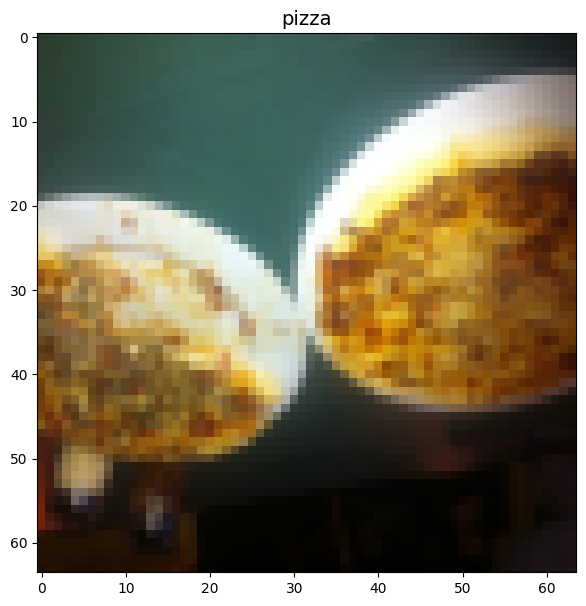

In [26]:
# rearrange the order of the dimenssion 
img_permute = img.permute(1,2,0)

# print out different shape 
print(f'original shape {img.shape } ->  channels , height , widht ')
print(f'original shape {img_permute.shape } ->   height , widht ,channles ')

# plot the image
plt.figure(figsize =(10,7))
plt.imshow(img_permute)
plt.axis('on')
plt.title(class_names[label], fontsize = 14)



### turninig the image datatsets into dataloader 
A dataloader is going to help us turn `Datasets` into iteralbe and we can custom the batch_siez so model can see batch_size  image at a time 

In [27]:
!nvidia-smi

Wed Jun 12 22:05:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P8               5W /  35W |     10MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [28]:
import os
os.cpu_count()

16

In [29]:
# turn train and test datasets into dataloader's 
from torch.utils.data import DataLoader
BATCH_SIZE =32
train_dataloader = DataLoader (dataset =train_data ,
                               batch_size =BATCH_SIZE ,
                              num_workers= 10,
                              shuffle= True)
test_dataloader = DataLoader (dataset =test_data ,
                              batch_size =BATCH_SIZE ,
                              num_workers= 10,
                              shuffle= False)

In [30]:
train_dataloader ,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x701626862290>,
 <torch.utils.data.dataloader.DataLoader at 0x701626863ca0>)

In [31]:
len(train_dataloader) ,len(test_dataloader)

(8, 3)

In [32]:
img ,label  = next(iter(train_dataloader))

# Bath siez will now be 1 you can change the batch size  if you like 
print(f'Image shape {img.shape} [axth_size -> color_channels -> height wirdht ]')
print(f'label shape {label.shape}')

Image shape torch.Size([32, 3, 64, 64]) [axth_size -> color_channels -> height wirdht ]
label shape torch.Size([32])


###  5. option 2  . loading image data with a custom `Dataset`
1. wnat to be able to load  image from file
2. want to  be able to get class names form the datasets
3. want to be avle to get classes as dictionary from the dataset

pros: 
* can create a `Dataset` out of almost anything
* NOt limited to pytorch pre-built dataset functio n

cons: 
* even through you create Dataset out of almost anything , it doesnt mean it will work
* using a custom dataset often results in us writing more code , which could be prone to erros or performance issue
  

In [33]:
import os 
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset

from torchvision import transforms 
from typing import Tuple ,Dict , List


### 5.1 creating ahelper function to get class names
we want a function to :
1. get the class names using `os.scandir()` to traverse a target directory (idesally the directory is in standard image classification dformat ).
2. raise an error if the class names are'nt founf (fi this happens , there might be something wrong with the drirectory)
3. turn the clas names into a dict and a list and return them 

In [34]:
# setup path for target direcotry 
target_directory =train_dir 
print(f'target dir : {target_directory}')

#get the class names from the target directory  
class_names_found  =sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target dir : data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [35]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

In [36]:
### function for find class 
def find_classes(directory : str) -> Tuple[List[str],Dict[str ,int]] :
    """ find the calsses  folder name in a target directory 
    """
    #1. get the class name s by scanning the target directory 
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    # raise an error if the class name is not find  
    if not classes:
        raise FileNotFoundError(f"couldn't find any classes in {directory}....please check file structure ")
    # create a dict of index labels (compare prefer number rather than string as label )
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes ,class_to_idx

find_classes(target_directory)


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### create a custom dataset to replicate ImageFolder

to create our own custom dataset , we want to
1. subclass `torch.utils.data.dataset`
2. init our subclasss woth a target directory (the directory we had like to get th e data ) as well as a trasform it we had like to transform our data
3. creata several attributes
  * paths =path of our image
  * trasform -the transform we had like to use
  * classes - a list of the taret classe
  * class_to_idx  - dict of target classes mapped to integer labes
4. create a function to load_images()  `load_image` this function will open an image
5. overwrite the __len()__ method to retur nthe length of our datset
6. overwriet the __getitem()__ method to returhn a given sample when passed an index


In [37]:
# write a custom dataset class
from torch.utils.data import Dataset

# 1subsclass torch.utils.data.dataset
class ImageFolderCustom(Dataset):
    # initialize our custom dataset
    def __init__(self,targ_dir:str ,
                transform = None ):
        ## create class atributes
        # get all of teh image paths 
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # setup trasform 
        self.transform = transform
        #  create classes and class_to_idx attributes 
        self.classes , self.class_to_idx = find_classes(targ_dir) 
    def load_image(self,index :int ) ->Image.Image:
        # load the image of the given index 
        image_path = self.paths[index]
        return Image.open(image_path)
    # overwrite  __len()__
    def __len__(self) -> int:
        """return the total number of sample 
        """
        return len(self.paths)
    # overwrite __getietem()__  method to return a particular sample 
    def __getitem__(self, index:int ) -> Tuple[torch.Tensor ,int] :
        """return one sampel of data , data and label (X,y)
        """
        img = self.load_image(index)
        class_name =self.paths[index].parent.name # it excepts the path format : data_folder / class_name / image.jpg
        class_idx = self.class_to_idx[class_name]
        # trasform if necessary 
        if self.transform:
            return self.transform(img) ,class_idx #return 
        else :
            return img, class_idx # return the untransform img 

In [38]:
# create a transform 
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size =(64,64)),
    transforms.RandomHorizontalFlip(p =0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size =(64,64)),
    transforms.ToTensor()
    
])

In [39]:
# test out ImageFolderCustom 
train_data_custom = ImageFolderCustom(targ_dir= train_dir ,
                                     transform= train_transforms)
test_data_custom =ImageFolderCustom(targ_dir= test_dir,
                                   transform= test_transforms)

In [40]:
len(train_data_custom) ,len(test_data_custom)

(225, 75)

In [41]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [42]:
train_data_custom[0]

(tensor([[[0.3686, 0.3725, 0.7098,  ..., 0.4902, 0.6824, 0.6627],
          [0.3843, 0.4863, 0.7216,  ..., 0.6196, 0.7176, 0.7059],
          [0.4000, 0.5725, 0.6588,  ..., 0.7333, 0.7529, 0.7216],
          ...,
          [0.3137, 0.3059, 0.2863,  ..., 0.1765, 0.1686, 0.1686],
          [0.2824, 0.2784, 0.2588,  ..., 0.2000, 0.1882, 0.1647],
          [0.2314, 0.2000, 0.1333,  ..., 0.2078, 0.1922, 0.1804]],
 
         [[0.4078, 0.3922, 0.7059,  ..., 0.3686, 0.5569, 0.5373],
          [0.4275, 0.4627, 0.6784,  ..., 0.4980, 0.5882, 0.5725],
          [0.4314, 0.5098, 0.6039,  ..., 0.6039, 0.6118, 0.5765],
          ...,
          [0.2157, 0.2000, 0.1686,  ..., 0.0941, 0.0902, 0.0941],
          [0.1765, 0.1529, 0.1373,  ..., 0.0941, 0.0941, 0.0902],
          [0.1412, 0.1137, 0.0784,  ..., 0.0980, 0.1020, 0.0941]],
 
         [[0.3569, 0.3922, 0.7333,  ..., 0.3216, 0.5098, 0.4980],
          [0.3529, 0.4549, 0.7412,  ..., 0.4510, 0.5451, 0.5294],
          [0.3765, 0.5216, 0.6588,  ...,

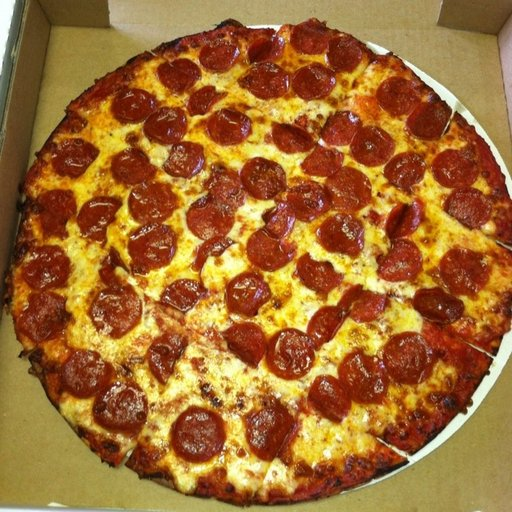

In [43]:
train_data_custom.load_image(3)

### createa function to displat random images 
1. take in  a `dataset` and a number of other paramater such as class names and how many images to visualize
2. to prevent the display geting out hand , let's cap the number of images to  see at 10
3. set the random seed for reproductibility
4. get a list of random sample indexes from the target dataset
5. setup a matplotlib plot
6. loop through the sample imges and plot them with matplotlib
7. make sure the dimension for our image line up with matplotlib



In [44]:
#1.create a function to take in a datastes 
def display_random_images (dataset : torch.utils.data.Dataset,
                          classes : List[str] =None , 
                           n : int =10 ,
                           display_shape :bool =True,
                          seed : int = None):
    #2.adjust display if n is too high 
    if n > 10 :
        n = 10
        display_shape = False
        print(f'for the display , purpose , n should not be larger than 10 , setting to 10 and removing shape display  ')
    #  3. set the seed 
    if seed:
        random.seed(seed)

    #4. get the ranndom sapmple index
    random_samples_idx = random.sample(range(len(dataset)),k = n)

    #5. set up the plot 
    plt.figure(figsize  =(16, 8))
    
    #6. loop through random indxes and plot them with matplotlib 
    for i ,targ_sample  in enumerate(random_samples_idx):
        targ_image ,targ_label = dataset[targ_sample][0] ,dataset[targ_sample][1]

        # 7. Adjust tensor dimaensions for ploting 
        targ_image_adjust = targ_image.permute(1,2,0) # COLOR , HEIHGT ,WIDHT 
        # plot adjust sample 
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis('off')
        if classes:
            title = f'class: {classes[targ_label]}'
        if display_shape : 
            title =title + f"\nshape : {targ_image_adjust.shape}" 
        plt.title(title)

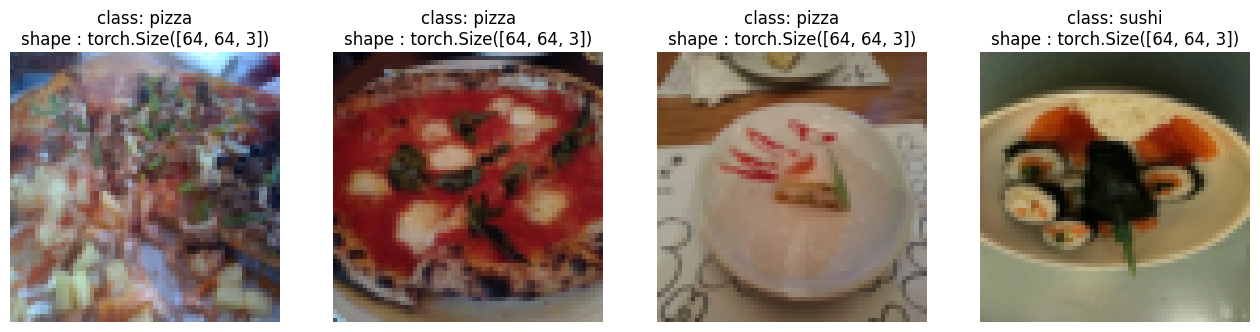

In [45]:
# display random from the imagesfolder 
display_random_images(train_data,
                     n = 4 ,
                     classes= class_names,
                     seed = None)

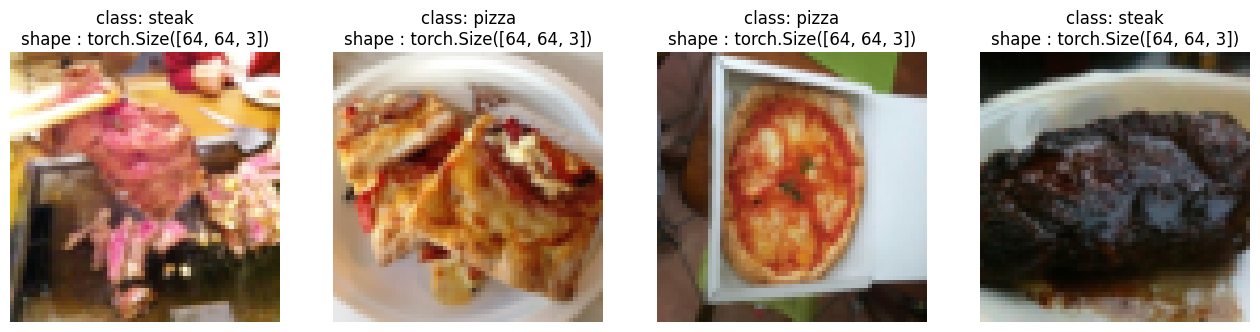

In [46]:
# display random from our own dataset 
display_random_images(train_data_custom ,
                     n =4 ,
                     classes= class_names ,
                     seed =42)

### turn the custom  loaded images  into dataloader 

In [47]:
from torch.utils.data import DataLoader
BATCH_SIZE =32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom =DataLoader(train_data_custom,
                             batch_size= BATCH_SIZE,
                             num_workers= 0,
                             shuffle= True)
test_dataloader_custom = DataLoader(test_data_custom,
                             batch_size= BATCH_SIZE,
                             num_workers = os.cpu_count() ,
                              shuffle = False )
train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x70166bd38fa0>,
 <torch.utils.data.dataloader.DataLoader at 0x70166bd3ad40>)

In [48]:
# get image and label form custom dataloader 
img_custom ,label_custom = next(iter(train_dataloader_custom))

img_custom.shape ,label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### 6. Other forms of transforms (data agumentation )
Data augmaentation is the process of artificially adding diversity to your training data 
in the case of images data, this may mean applying various images trasformation to the training images 

let's take a look at one particular type of data augmenation used to train Pytorch vision models to sate fo the art levels.......

In [49]:
#let's look at trival augment 
from torchvision import transforms

train_transforms =transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
    
])

In [50]:
# get all image paths 
image_path_list = list(image_path.glob('*/*/*.jpg'))

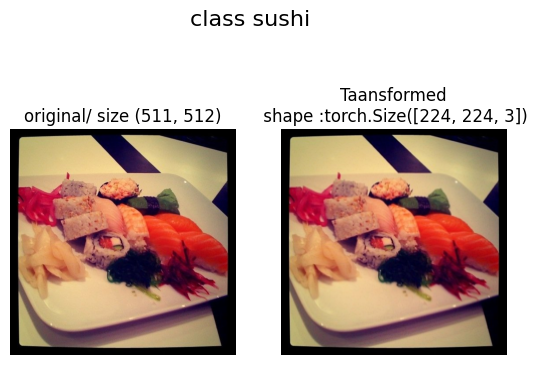

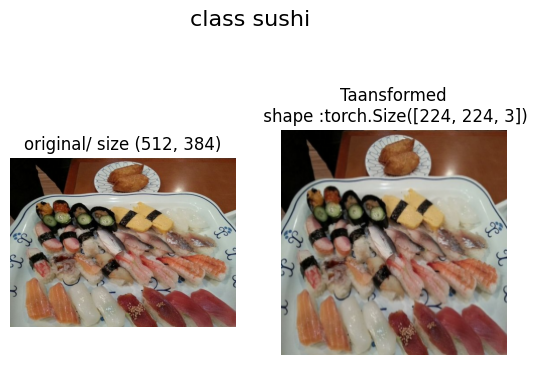

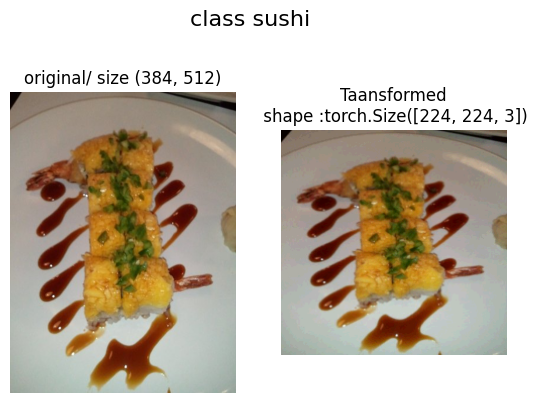

In [51]:
# plot random transformed images 
plot_transformed_image(
    image_paths= images_path_list,
    transform= train_transforms,
    n =3 ,
    seed = None
)

## 7. model 0 : TinyVGG without data augmentation 
let's replicate TInyVGG architecture from the CNN Explainer website 

### 7.1 Creating transform and loading data for Model 0

In [52]:
# Create simple trasform 
simple_trasform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [53]:
#3 1. load and trasform the data 
from torchvision import datasets 
train_data_simple = datasets.ImageFolder(root = train_dir,
                                        transform= simple_trasform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                       transform = simple_trasform)

import os 
from torch.utils.data import DataLoader 
BATHC_SIZE =32 
NUM_WORKERS = os.cpu_count()

# 2. turn the dataset into dataloader 
train_dataloader_simple = DataLoader(dataset = train_data_simple ,
                                    batch_size= BATCH_SIZE,
                                    shuffle= True,
                                    num_workers= NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset= test_data_simple,
                                   batch_size = BATCH_SIZE ,
                                   shuffle= False,
                                   num_workers= NUM_WORKERS )

### 7.2 Create aTinyVGG model class 


In [54]:
class TinyVGG(nn.Module):
    """ 
    model architecture copying TInyVGG from CNN Expliainer 
    """
    def __init__(self,input_shape :int,
                hidden_units : int,
                output_shape : int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride= 1,
                     padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride = 1, 
                     padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2, 
                        stride= 2) # default the stride size is same as the kernel size 
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride= 1,
                     padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride = 1, 
                     padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2, 
                        stride= 2) # default the stride size is same as the kernel size 
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= hidden_units*13*13,
                     out_features= output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x =self.conv_block_2(x)
        # print(x.shape)
        x =self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [55]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape= 3, # number of colour channels in out image data
                 hidden_units= 10,
                 output_shape= len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [56]:
### 7.3 try a forward pass on a single imag e(to test the model)
image_batch  ,label_batch = next(iter(train_dataloader_simple))
image_batch.shape ,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [57]:
# try  a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9128e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6416e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7978e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7226e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2131e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [58]:
from torchinfo import summary 
summary(model_0,input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [59]:
!pip install torchinfo

Defaulting to user installation because normal site-packages is not writeable


### 7.4 creating training and testing loop function 
`train_step` - take in a model and dataloader and trains the model on the dataloader 
`test_step()` takes in a model and dataloader and evaluates the model on the dataloader 

In [60]:
# create a train_step ()
def train_step(model : torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer : torch.optim.Optimizer,
              device : device ):
    # put the model in train mode
    model.train()
    # setup train loss and train accuracy  values 
    train_loss ,train_acc = 0 ,0 
    # loop thorught data batches 
    for batch ,(X,y) in enumerate(dataloader):
        # send data to the target device
        X,y = X.to(device) ,y.to(device)
        # 1. forward pass
        y_pred = model(X)
        # 2.calculate the loss
        loss  = loss_fn(y_pred ,y )
        train_loss += loss.item()

        #3. optimizer zero grad 
        optimizer.zero_grad()

        #4. loss backward
        loss.backward()

        # 5. optimizer step 
        optimizer.step()
        # calculating accuracy metirc
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim =1),dim =1)
        train_acc += (y_pred_class == y).sum().item() /len(y_pred)
        # adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss /len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss ,train_acc

In [61]:
### create a test_step function 
def test_step(model : torch.nn.Module,
             dataloader :  torch.utils.data.DataLoader,
             loss_fn : torch.nn.Module,
             device : device):
    # put modle in eval mode 
    model.eval()
    # setup test loss and test accuracy values  
    test_loss , test_acc = 0 ,0

    # truth on inference mode 
    with torch.inference_mode():
        # loop throught dataloader batches 
        for batch ,(X,y) in enumerate(dataloader):
            X, y = X.to(device) ,y.to(device)
            # forward pass
            test_pred_logits = model(X)
            # calculate the loss 
            loss = loss_fn(test_pred_logits,y)
            test_loss += loss.item()

            # calculate the accuracy 
            test_pred_labels = test_pred_logits.argmax(dim = 1 )
            test_acc += ((test_pred_labels == y ).sum().item()/len(test_pred_labels))
    # adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss /len(dataloader)
    test_acc = test_acc /len(dataloader)
    return test_loss,test_acc

### 7.6 creating a train() function to combine train_step() and test_step()

In [62]:
from tqdm.auto import tqdm 

# 1. create a train function that in various parameters + optimizer + dataloader 

def train(model : torch.nn.Module,
         train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn : torch.nn.Module,
         epochs  : int = 5,
         device =device):
    # create empty result dictionary 
    results = {"train_loss" :[],
               "train_acc" : [],
               'test_loss' : [],
               "test_acc" : []}
    # loop through training and testing step for a number of epochs 
    for epoch in tqdm(range(epochs)):
        train_loss,train_acc = train_step( model= model,
                                         dataloader= train_dataloader,
                                          loss_fn = loss_fn,
                                         optimizer= optimizer,
                                         device = device)
        test_loss ,test_acc = test_step(model= model,
                                       dataloader = test_dataloader,
                                       loss_fn= loss_fn ,
                                       device =device)
    # print out what is happning 
        print(f'epoch: {epoch} | train loss :{train_loss:.2f} | train acc :{train_acc:.2f} | test_loss : {test_loss:.2f} | test_acc : {test_acc:.2f}')
    # update the dictionary 
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)
    return results

### 7.7 train and evaluate model 0

In [82]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs 
NUM_EPOCHS = 5
# recreate an instance of TInyVGG
model_0 =TinyVGG(input_shape = 3, 
                hidden_units = 10,
                output_shape= len(train_data.classes)).to(device)

# setup the loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                            lr = 0.001)

# start the timer 
from timeit import default_timer as timer 
start_time = timer()

# train modle_0 
model_0_results  = train(model= model_0,
                        train_dataloader =train_dataloader_simple,
                        test_dataloader= test_dataloader_simple,
                        optimizer= optimizer,
                        loss_fn= loss_fn,
                        epochs= NUM_EPOCHS)
# end the timer and print out how long it took 
end_timer = timer()
print(f'total traning time :{end_timer -start_time:.3f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0 | train loss :1.11 | train acc :0.30 | test_loss : 1.10 | test_acc : 0.30
epoch: 1 | train loss :1.10 | train acc :0.33 | test_loss : 1.07 | test_acc : 0.54
epoch: 2 | train loss :1.09 | train acc :0.49 | test_loss : 1.08 | test_acc : 0.50
epoch: 3 | train loss :1.08 | train acc :0.40 | test_loss : 1.06 | test_acc : 0.58
epoch: 4 | train loss :1.07 | train acc :0.41 | test_loss : 1.07 | test_acc : 0.56
total traning time :4.258 seconds


### plot the loss curves of model 0 


In [64]:
# get the model_0_results
print(model_0_results.keys())

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])


In [65]:
def plot_loss_curves(results: Dict[str,List[float]]):
    """
    plot trainigng curves of a results dictionary 
    """
    # get the loss values of the results dictionary (training )
    loss = results['train_loss']
    test_loss = results['test_loss']

    # get the accuracy values of the results dictionary (training and test )
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # figure out how many epochs there were
    epochs =range(len(results['train_loss']))

    # setup a plot
    plt.figure(figure=(15,7))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label ='train_loss')
    plt.plot(epochs , test_loss ,label = 'test_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # plot the accuracy 
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label ='accuracy ')
    plt.plot(epochs , test_accuracy ,label = 'test_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

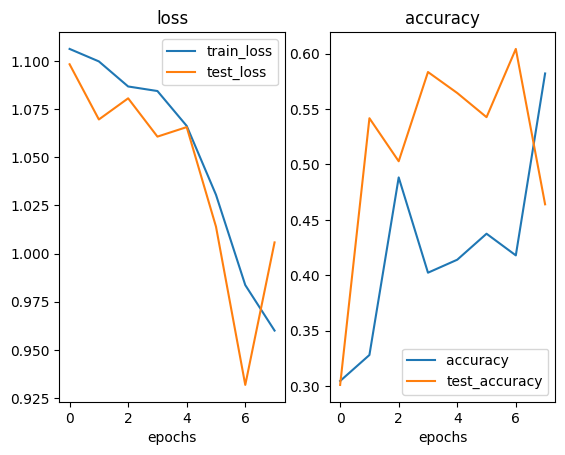

In [66]:
plot_loss_curves(model_0_results)

### 8. what should an ideal loss curve look like 
A loss curve is one o fhte most helpful ways  to troubleshoot  a model 

### Creating model 1 : 

### 9. model 1 : TinyVGG with data augmentation 
Now let's try another modelling experiment this using the same model as before 

#### 9.1 Create trasform with data augmentation  

In [67]:
# create training transform with TriviaialAugment
from torchvision import transforms
train_transform_traivial = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins= 31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

#### 9.2 Create atrain and test datasets and DataLoader with the data augmentation 


In [69]:
# turn image folder inot datasets 
from torchvision import datasets
train_data_augmented =  datasets.ImageFolder(root = train_dir,
                                            transform= train_transform_traivial)
test_data_augmented = datasets.ImageFolder(root = test_dir,
                                          transform= test_transform_simple)



In [72]:
# turn out dataset inot DataLoader 
import os 
from torch.utils.data import DataLoader
BATCH_SIZE  = 32 
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset= train_data_augmented,
                                       batch_size= BATCH_SIZE,
                                       shuffle= True,
                                       num_workers= NUM_WORKERS)

test_dataloader_augmented = DataLoader(dataset= test_data_simple,
                                      batch_size= BATCH_SIZE,
                                      shuffle=False,
                                      num_workers= NUM_WORKERS)

#### 9.3 COnstruct and train model 1
this time we will use same modle architecture except this time we have augmented the rtraining data

In [73]:
# create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape= 3, 
                 hidden_units= 10,
                 output_shape= len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [77]:
## training 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

# set up the loss function 
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                            lr = 0.001)
# start the timer
from timeit import default_timer as timer 
start_time = timer()

# train model_1
model_1_results = train(model= model_1 ,
                       train_dataloader= train_dataloader_augmented,
                       test_dataloader= test_dataloader_simple,
                       optimizer= optimizer,
                       loss_fn= loss_fn ,
                       epochs= NUM_EPOCHS,
                       device= device)

# end the tiemer and print  the total value 
end_time = timer()
print(f'total time :{end_time -start_time }sec')

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0 | train loss :0.92 | train acc :0.62 | test_loss : 1.02 | test_acc : 0.35
epoch: 1 | train loss :0.86 | train acc :0.58 | test_loss : 1.08 | test_acc : 0.33
epoch: 2 | train loss :0.86 | train acc :0.59 | test_loss : 1.12 | test_acc : 0.34
epoch: 3 | train loss :0.82 | train acc :0.61 | test_loss : 1.09 | test_acc : 0.37
epoch: 4 | train loss :0.81 | train acc :0.65 | test_loss : 1.06 | test_acc : 0.34
total time :4.286047131000032sec


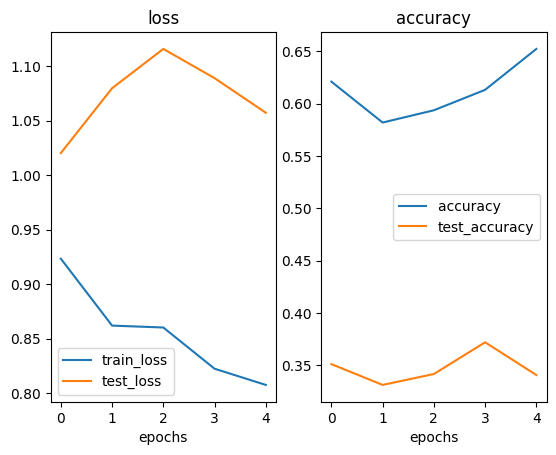

In [79]:
# plot the loss curves 
plot_loss_curves(model_1_results)

### Compare the model rasults 
After evluating our modelling experiments in their own , it's importnat  caompare them to each ohter
There is a few diffenent ways to do this 
1. Hard coding (whats we are doing)
2. pytorch + tensboard
3. Weights  and bias


In [83]:
import pandas as pd
model_0_df  =pd.DataFrame(model_0_results)
model_1_df  =pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098342,0.301136
1,1.099833,0.328125,1.069670,0.541667
2,1.086809,0.488281,1.080657,0.502841
3,1.084423,0.402344,1.060760,0.583333
4,1.066293,0.414062,1.065717,0.564394


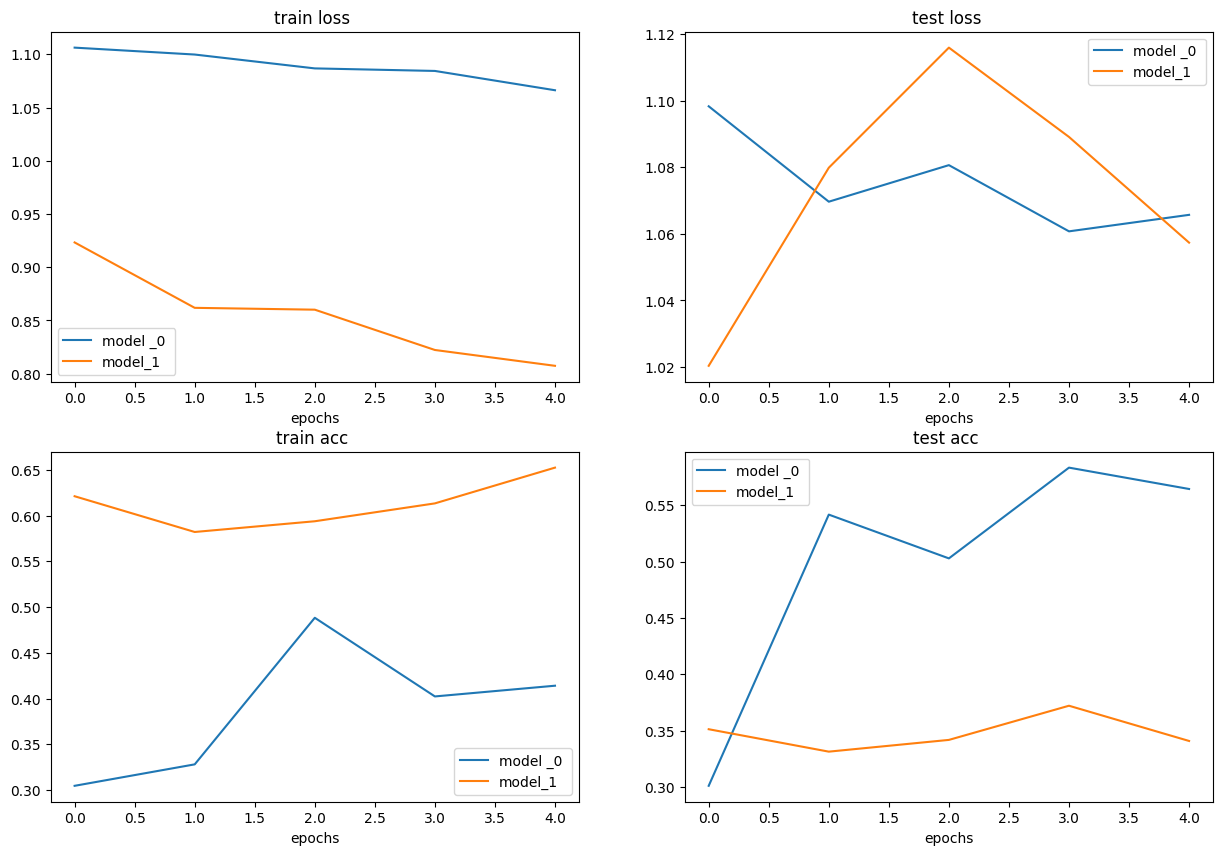

In [89]:
# Setup a plot 
plt.figure(figsize= (15,10))

# get number of epochs
epochs = range(len(model_0_df))

# plot train loss 
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'] , label  = 'model _0 ')
plt.plot(epochs ,model_1_df['train_loss'] ,label = 'model_1')
plt.title('train loss ')
plt.xlabel('epochs')
plt.legend()

# plot train loss 
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'] , label  = 'model _0 ')
plt.plot(epochs ,model_1_df['test_loss'] ,label = 'model_1')
plt.title('test loss ')
plt.xlabel('epochs')
plt.legend()

# plot train acc
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'] , label  = 'model _0 ')
plt.plot(epochs ,model_1_df['train_acc'] ,label = 'model_1')
plt.title('train acc ')
plt.xlabel('epochs')
plt.legend()

# plot test acc 
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'] , label  = 'model _0 ')
plt.plot(epochs ,model_1_df['test_acc'] ,label = 'model_1')
plt.title('test acc ')
plt.xlabel('epochs')
plt.legend()

### 11. making a predicion on a custom image 
Although we have trained a model on a cusom data  ... 

In [92]:
# Download custom image 
import requests 
# setup custom image path 
custom_image_path = data_path/'04-pizza-dad-jpeg'

# Dowload the image if it doesnit already exist 
if not custom_image_path.is_file():
    with open(custom_image_path,'wb') as f:
        # when downloading frome github 
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f'download {custom_image_path}')
        f.write(request.content)
else :
     print(f"{custom_image_path} already exist")

download data/04-pizza-dad-jpeg


### 11.1 loading in a custom image with Pytorch
we have make sure our custom image is in the same format as the data  our model was trained on
* in tensor form dataatype 
* of shape 64*64
* on the rigth dvice 

we can read an image into pytorch using 
 read_image


In [98]:
import torchvision

# read  in custom image
custom_image_unit8 = torchvision.io.read_image(custom_image_path)
custom_image_unit8.shape ,custom_image_unit8.dtype ,custom_image_unit8

(torch.Size([3, 4032, 3024]),
 torch.uint8,
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
          [146, 165, 181,  ...,  21,  18,  15],
          [124, 146, 172,  ...,  18,  17,  15],
          ...,
          [ 72,  59,  45,  ..., 152, 150, 148],
          [ 64,  55,  41,  ..., 150, 147, 144],
          [ 64,  60,  46,  ..., 149, 146, 143]],
 
         [[171, 190, 193,  ...,  22,  19,  15],
          [163, 182, 193,  ...,  22,  19,  16],
          [141, 163, 184,  ...,  19,  18,  16],
          ...,
          [ 55,  42,  28,  ..., 107, 104, 103],
          [ 47,  38,  24,  ..., 108, 104, 102],
          [ 47,  43,  29,  ..., 107, 104, 101]],
 
         [[119, 138, 147,  ...,  17,  14,  10],
          [111, 130, 145,  ...,  17,  14,  11],
          [ 87, 111, 136,  ...,  14,  13,  11],
          ...,
          [ 35,  22,   8,  ...,  52,  52,  48],
          [ 27,  18,   4,  ...,  50,  49,  44],
          [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8))

In [112]:
# try to make a prediction on an image in unit8 format 
model_1.eval()
with torch.inference_mode():
    model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)

In [110]:
# load in the custom image and convert to the tocrch.float32
custom_image = torchvision.io.read_image(custom_image_path).type(torch.float32)/255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [113]:
custom_image.shape

torch.Size([3, 4032, 3024])

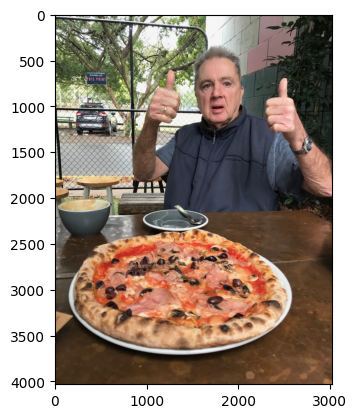

In [114]:
plt.imshow(custom_image.permute(1,2,0))

In [109]:
img.shape

torch.Size([32, 3, 64, 64])

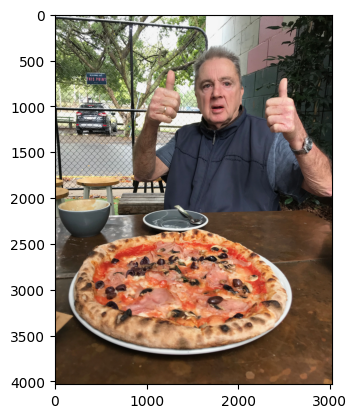

In [116]:
plt.imshow(custom_image_unit8.permute(1,2,0))

In [122]:
# create transform pipline to resize image 
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size =(64,64))
])

custom_image_transformed = custom_image_transform(custom_image)

custom_image_transformed.shape ,custom_image.shape

(torch.Size([3, 64, 64]), torch.Size([3, 4032, 3024]))

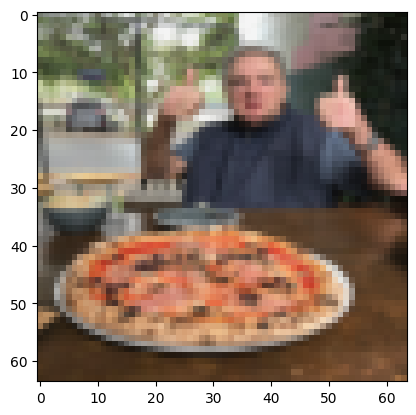

In [123]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [124]:
# this will give error  , image not in rigth device
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper_CUDA___slow_conv2d_forward)

In [126]:
custom_image_transformed.shape , custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [127]:
# this will work , added a batch size
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred 

tensor([[-0.0600, -0.3945, -0.9153]], device='cuda:0')

Note , to make a prediction on a custom image we had to :
* Load the image and turn it into a tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data the model was trained on(3,64,64) with a batch size (1,3,64,64)
* Make sure the image was on the same device as our model 

In [128]:
# convert the logita prediction into labels 
custom_image_pred_probs = torch.softmax(custom_image_pred,dim = 1)
custom_image_pred_probs

tensor([[0.4671, 0.3343, 0.1986]], device='cuda:0')

In [129]:
# convert the prediction problities  - > prediction
custom_image_pred_labels = torch.argmax(custom_image_pred_probs,dim =1)
custom_image_pred_labels

tensor([0], device='cuda:0')

In [130]:
class_names[custom_image_pred_labels]

'pizza'

#### 11. 3 puttinf custom image prediction together : building a function 
ideal outcome 
A function  where we pass an  image path to and have our model predict on that image and plot the image + predction 


In [140]:
def pred_and_plot_image(model:torch.nn.Module,
                       image_path:str,
                       class_names : List[str]= None,
                       transform = None,
                       device =device):
    """Make a prediction on a target iamge with a trained model and plots the image and prediction ."""
    # load in the image
    target_image = torchvision.io.read_image(image_path).type(torch.float32)

    # divide the image pixel values by 255 to get them between [0,1]
    target_image = target_image /225 

    # transform if necessary 
    if transform :
        target_image  = transform (target_image)
    # make  sure the model is on the targer device
    model.to(device)
    # turn on eval /inference_mode() and make prediction 
    model.eval()
    with torch.inference_mode():
        # add an extra dimmenssion to the image (this is the batch dimension ,e.g. out model will predict on the bacthces of 1 x images)
        target_image = target_image.unsqueeze(0)
        # make a pedction on the image with an extra dimension 
        target_image_pred = model(target_image.to(device))
    # convert logits to prediction 
    target_image_pred_probs = torch.softmax(target_image_pred,dim = 1)

    # convet the probs to the labels
    target_image_pred_label = torch.argmax(target_image_pred_probs,dim =1 )

    # plot the image alongside the predition and probilities 
    plt.imshow(target_image.squeeze().permute(1,2,0)) # remove the batch dimensioin and rearrange 
    if class_names:
        title = f"pred {class_names[target_image_pred_label.cpu()]} | pros : {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"pred {target_image_pred_label} | probs : {target_image_pred_probs.max().cpu():3.3f}"
    plt.title(title)
    plt.axis(False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


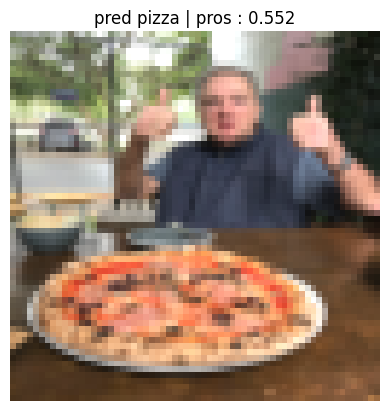

In [141]:
pred_and_plot_image(model = model_1,
                    image_path= custom_image_path,
                   class_names= class_names,
                   transform= custom_image_transform,
                   device =device)